Importing Modules

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize


Importing Data

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/lalitgarg12/Machine-Learning/master/ex2/ex2data1.txt', names=['x1','x2','y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Printing X and y values and their shapes

In [0]:
X = np.asarray(data[["x1","x2"]])
y = np.asarray(data["y"])
print(X[:5])
print(y[:5])
print(X.shape)
print(y.shape)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0 0 0 1 1]
(100, 2)
(100,)


Defining plot function and printing initial 2D plot of data to visualize how it looks like.

In [0]:
def plotData(X, y):
    pos = X[np.where(y==1)]
    neg = X[np.where(y==0)]
    fig, ax = plt.subplots()
    ax.plot(pos[:,0],pos[:,1],"k+",neg[:,0],neg[:,1],"yo")
    return (fig, ax)

Plotting data with + indicating (y = 1) examples and o indicating  (y =0) examples.


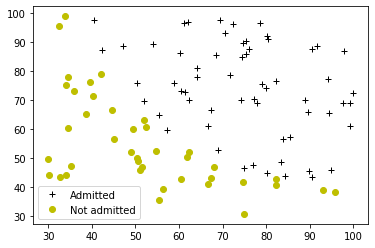

In [0]:
print("Plotting data with + indicating (y = 1) examples and o indicating",
" (y =0) examples.")
fig, ax = plotData(X, y)
ax.legend(['Admitted', 'Not admitted'])
fig.show()


Defining sigmoid function and its plot.

In [0]:
def sigmoid(z):
    return 1.0/(1 +  np.e**(-z))

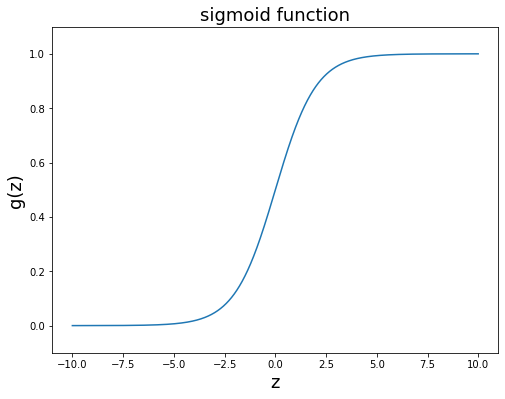

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()


Defining cost function on the input features and assumed theta values.

In [0]:
def costFunction(theta,X,y):
    m = len(y) 
    J =(np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-
       (1-y)*(np.log(1-sigmoid(np.dot(X,theta)))))/m)
    grad = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m)
    return (J, grad)


Defining prediction function based on new optimized theta parameters.

In [0]:
def predict(theta,X):
    """
    Given a vector of parameter results and training set X,
    returns the model prediction for admission. If predicted
    probability of admission is greater than .5, predict will
    return a value of 1.
    """
    return np.where(np.dot(X,theta) > 5.,1,0)

Preprocessing of X and y vectors for performing Logistic Regression.

Calculating cost based on cost function defined above.

In [0]:
# Add intercept term to x and X_test
X = np.hstack((np.ones_like(y)[:,None],X))
initial_theta = np.zeros(3)
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): \n', cost)
print('Gradient at initial theta (zeros): \n',grad)

Cost at initial theta (zeros): 
 0.6931471805599453
Gradient at initial theta (zeros): 
 [ -0.1        -12.00921659 -11.26284221]


Performing cost optimization based on scipy library function (Minimize)

In [0]:
res = minimize(costFunction,
	       initial_theta,
	       method='Newton-CG',
	       args=(X,y),
	       jac=True, 
	       options={'maxiter':400,
			'disp':True})


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 30
         Function evaluations: 74
         Gradient evaluations: 267
         Hessian evaluations: 0


Updating theta parameters based on minimize cost

In [0]:
theta = res.x
print('Cost at theta found by minimize: \n', res.fun)
print('theta: \n', theta)

Cost at theta found by minimize: 
 0.2034977017500866
theta: 
 [-25.16237296   0.20624003   0.20148001]


Defining plotting decision boundary function based on theta parameters on the probability of 0.5

In [0]:
def plotDecisionBoundary(theta,X,y):
    """X is asssumed to be either:
        1) Mx3 matrix where the first column is all ones for the intercept
        2) MxN with N>3, where the first column is all ones
    """
    fig, ax = plotData(X[:,1:],y)
    if len(X[0]<=3):
# Choose two endpoints and plot the line between them
        plot_x = np.array([min(X[:,1])-2,max(X[:,2])+2])
        plot_y = np.array(-1/theta[2])*(theta[1]*plot_x + theta[0])
        ax.plot(plot_x,plot_y)
        ax.legend(['Admitted','Fail','Pass'])
        ax.set_xbound(30,100)
        ax.set_ybound(30,100)
    else:
# Create grid space
        u = np.linspace(-1,1.5,50)
        v = np.linspace(-1,1.5,50)
        z = np.zeros((len(u),len(v)))
# Evaluate z = theta*x over values in the gridspace
        for i in range(len(u)):
            for j in range(len(v)):
                z[i][j] = np.dot(mapFeatureVector(np.array([u[i]]),np.array([v[j]])),theta) 
# Plot contour
        ax.contour(u,v,z,levels=[0])
    return (fig,ax)


Plotting decision boundary line

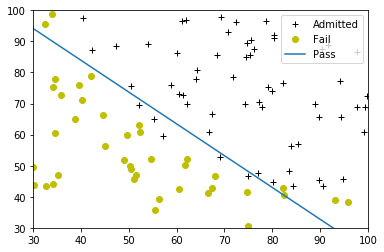

In [0]:
plotDecisionBoundary(theta, X, y)
plt.show()


Making predictions based on optimized theta parameters learned by logistic regression model

In [0]:
prob = sigmoid(np.dot([1,45,85],theta))
print('For a student with scores 45 and 85, we predict an ',
      'admission probability of ', prob)


For a student with scores 45 and 85, we predict an  admission probability of  0.7762993033047331


Predicting the accuracy of the model based on how accurate the prediction is.

In [0]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: \n', np.mean(p==y)*100)

Train Accuracy: 
 69.0
